**写在前面**：本节内容是 [Datawhale五月的组队学习 - 集成学习（下）- CH5-集成学习之blending与stacking -【Task12 Blending集成学习算法】](https://github.com/datawhalechina/team-learning-data-mining/tree/master/EnsembleLearning) 的学习笔记，对应notebook的5.1,5.2节，学习周期2天

## 库和数据

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 作业

In [6]:
iris = load_iris()
data = iris['data']
target = iris['target']
# 创建训练集和测试集
X_train1,X_test,y_train1,y_test = train_test_split(data, target, test_size=0.2, random_state=1)
# 创建训练集和验证集
X_train,X_val,y_train,y_val = train_test_split(X_train1, y_train1, test_size=0.3, random_state=1)

In [9]:
#  设置第一层分类器
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

clfs = [
    SVC(probability = True),
    RandomForestClassifier(n_estimators=5, criterion='gini'),
    RandomForestClassifier(n_estimators=5, criterion='entropy'),
    ExtraTreesClassifier(n_estimators=5, criterion='gini'),
    ExtraTreesClassifier(n_estimators=5, criterion='entropy'),
    GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=5),
    KNeighborsClassifier(),
]

# 设置第二层分类器
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [11]:
# 得到第一层的验证集结果与测试集结果
val_features = np.zeros((X_val.shape[0],len(clfs)))  # 初始化验证集结果
test_features = np.zeros((X_test.shape[0],len(clfs)))  # 初始化测试集结果

for i,clf in enumerate(clfs):
    clf.fit(X_train,y_train)
    val_feature = clf.predict_proba(X_val)[:, 1]
    test_feature = clf.predict_proba(X_test)[:,1]
    val_features[:,i] = val_feature
    test_features[:,i] = test_feature

# 将第一层的验证集的结果输入第二层训练第二层分类器
lr.fit(val_features,y_val)
# 输出预测的结果
from sklearn.model_selection import cross_val_score
cross_val_score(lr,test_features,y_test,cv=5)

array([0.83333333, 0.83333333, 0.83333333, 0.66666667, 0.66666667])

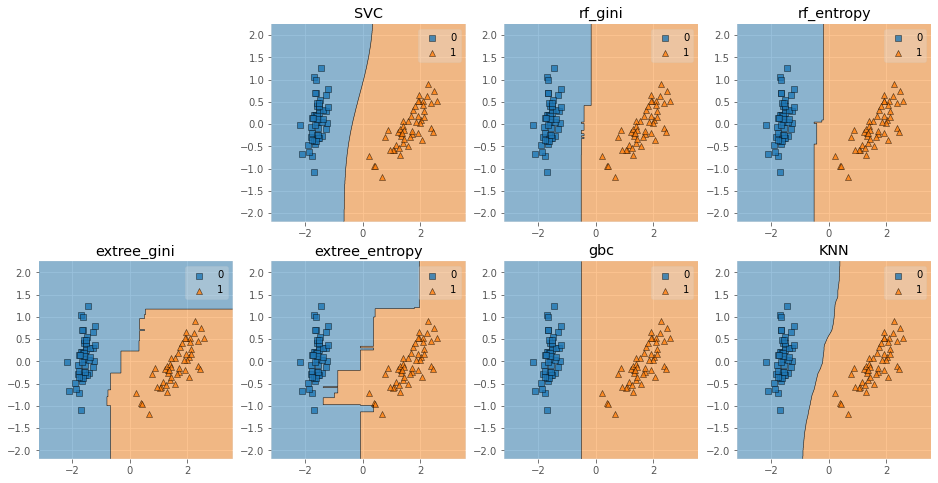

In [41]:
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(data[target!=2])
y = target[target!=2]
# 决策边界
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 4)
fig = plt.figure(figsize=(16,8))
for clf, lab, grd in zip([clf for clf in clfs], 
                         ['SVC', 
                          'rf_gini', 
                          'rf_entropy',
                          'extree_gini',
                          'extree_entropy',
                          'gbc',
                          'KNN'],
                          [i+1 for i in range(7)]):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd//4, grd%4])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)
plt.show()